# Segmenter les clients d'un site e-commerce

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

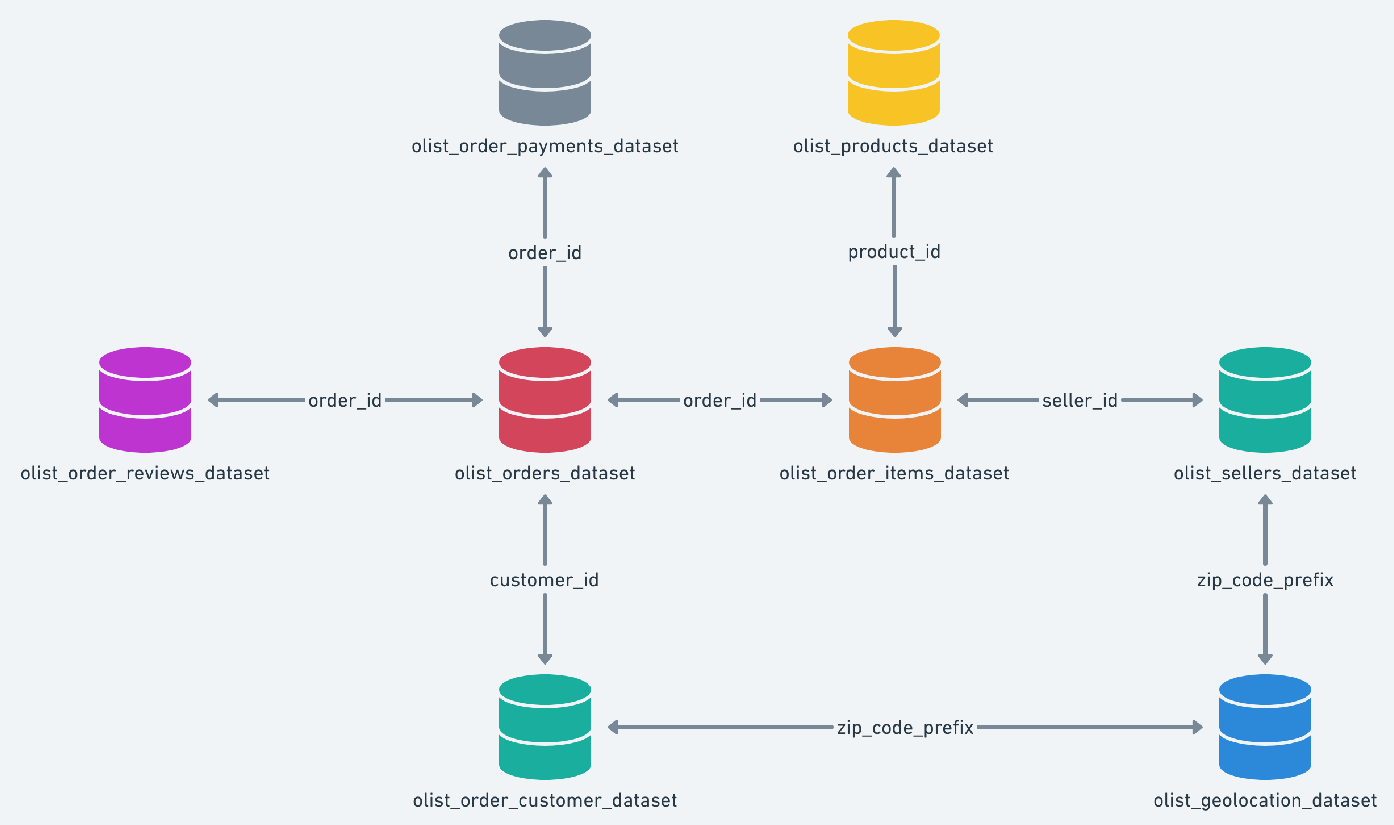

In [2]:
from IPython.display import display
from PIL import Image

image = Image.open("schema.png")
display(image)

### Importation des différentes datasets

In [3]:
customers_data = pd.read_csv("olist_customers_dataset.csv")
customers_data.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [4]:
geolocation_data = pd.read_csv("olist_geolocation_dataset.csv")
geolocation_data.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [5]:
order_items_data = pd.read_csv("olist_order_items_dataset.csv")
order_items_data.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [6]:
order_payments_data = pd.read_csv("olist_order_payments_dataset.csv")
order_payments_data.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
order_reviews_data = pd.read_csv("olist_order_reviews_dataset.csv")
order_reviews_data.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [8]:
orders_data = pd.read_csv("olist_orders_dataset.csv")
orders_data.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [9]:
products_data = pd.read_csv("olist_products_dataset.csv")
products_data.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
sellers_data = pd.read_csv("olist_sellers_dataset.csv")
sellers_data.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [11]:
product_name_data = pd.read_csv("product_category_name_translation.csv")
product_name_data.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


### Informations générales

In [12]:
all_df = [customers_data, orders_data, order_items_data, order_payments_data, 
          order_reviews_data, products_data, sellers_data, geolocation_data, product_name_data]

all_df_name = ["customers_data", "orders_data", "order_items_data", "order_payments_data", 
          "order_reviews_data", "products_data", "sellers_data", "geolocation_data", "product_name_data"]

for df, name_df in zip(all_df, all_df_name) :
    print(name_df, df.shape)
    print("-------------------")
    for col in df.columns:
        print('Colonne {}, {} valeurs uniques, {} Nan'.format(col, df[col].nunique(), df.isna().sum()[col]))
    print("---------------------------------------------------------------------------------------")
          

customers_data (99441, 5)
-------------------
Colonne customer_id, 99441 valeurs uniques, 0 Nan
Colonne customer_unique_id, 96096 valeurs uniques, 0 Nan
Colonne customer_zip_code_prefix, 14994 valeurs uniques, 0 Nan
Colonne customer_city, 4119 valeurs uniques, 0 Nan
Colonne customer_state, 27 valeurs uniques, 0 Nan
---------------------------------------------------------------------------------------
orders_data (99441, 8)
-------------------
Colonne order_id, 99441 valeurs uniques, 0 Nan
Colonne customer_id, 99441 valeurs uniques, 0 Nan
Colonne order_status, 8 valeurs uniques, 0 Nan
Colonne order_purchase_timestamp, 98875 valeurs uniques, 0 Nan
Colonne order_approved_at, 90733 valeurs uniques, 160 Nan
Colonne order_delivered_carrier_date, 81018 valeurs uniques, 1783 Nan
Colonne order_delivered_customer_date, 95664 valeurs uniques, 2965 Nan
Colonne order_estimated_delivery_date, 459 valeurs uniques, 0 Nan
--------------------------------------------------------------------------------

Quelques remarques générale :

   - Différents nombre d'id pour la jointure (exp entre order_item_data et orders_data)
   - Valeur manquantes : 
        - order_data (dates) 
        - order_review (commentaires) 
        - products_data (catégorie de produits)
   - Nombres de product_name différent (products_data et product_category_name)
 

## Etapes à réaliser : 
    
  - Regrouper les datasets importants
  - Nettoyage et exploration des données
  - Création de nouvelles variables
  - Analyse univariée et multivariée

#### Objectif : 

  - Préparer les données au clustering
  - Avoir un dataset avec un client = une ligne


### 1 - Regrouper les datasets importants :
Nous regroupons les datasets suivants : 
 
   - orders_data
   - customers_data
   - products_data
   - order_items_data
   - order_reviews_data

In [13]:
# Regroupement des data set customers et orders
df1 = pd.merge(customers_data, orders_data, on='customer_id', how='left')
df1.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00


In [14]:
df1.dtypes

customer_id                      object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
order_id                         object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [15]:
# Convertir les colonnes de date en objets datetime
df1['order_delivered_customer_date'] = pd.to_datetime(df1['order_delivered_customer_date'])
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])
df1['order_estimated_delivery_date'] = pd.to_datetime(df1['order_estimated_delivery_date'])

In [16]:
# Ajout de variables : délai de livraison et délai de livraison estimé 
df1['delevery_time']=df1['order_delivered_customer_date'] - df1['order_purchase_timestamp']
df1['estimated_delevery_time'] = df1['order_estimated_delivery_date'] - df1['order_purchase_timestamp']

In [17]:
df1.drop(columns=['customer_id', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_delivered_customer_date', 'order_estimated_delivery_date' ], inplace=True)
df1.head(2)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36


In [18]:
# Regroupement des data set customers, orders et order_items
df2 = pd.merge(df1, order_items_data, on='order_id', how='left')
df2.head(2)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48


In [19]:
df2.drop(columns=['seller_id', 'shipping_limit_date'], inplace=True)

In [20]:
# Regroupement des data set customers, orders, order_items et products_data
df3 = pd.merge(df2, products_data, on='product_id', how='left')
df3.head(2)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25,1.0,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36,1.0,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0


In [21]:
# ajout de la variable volume = longueur * hauteur * profondeur
df3['product_volume'] = df3['product_length_cm'] * df3['product_height_cm'] * df3['product_width_cm']

In [22]:
df3['product_volume_dm3'] = df3['product_volume']/1000
df3.head(5)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_volume_dm3
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25,1.0,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,107136.0,107.136
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36,1.0,...,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,53400.0,53.400
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,26 days 01:51:06,24 days 07:52:15,1.0,...,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,45968.0,45.968
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,14 days 23:57:47,27 days 07:53:22,1.0,...,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,79968.0,79.968
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,11 days 11:04:18,16 days 14:08:30,1.0,...,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,23625.0,23.625


In [23]:
df3.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_length_cm', 
                  'product_height_cm', 'product_width_cm', 'product_volume'], inplace=True)

In [24]:
# Regroupement des data set customers, orders, order_items, products_data et order_reviews
df4 = pd.merge(df3, order_reviews_data, on='order_id', how='left')
df4.head(2)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,...,freight_value,product_category_name,product_weight_g,product_volume_dm3,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25,1.0,...,21.88,moveis_escritorio,8683.0,107.136,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36,1.0,...,46.48,utilidades_domesticas,10150.0,53.400,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29


In [25]:
df4.drop(['review_id', 'review_comment_title', 'review_comment_message', 
          'review_creation_date', 'review_answer_timestamp' ], inplace=True, axis=1)
df4.head(2)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,product_id,price,freight_value,product_category_name,product_weight_g,product_volume_dm3,review_score
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,moveis_escritorio,8683.0,107.136,4.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,utilidades_domesticas,10150.0,53.400,5.0


In [26]:
# Regroupement des data set customers, orders, order_items, products_data, order_reviews et order_payments_data
df5 = pd.merge(df4, order_payments_data, on='order_id', how='left')
df5.head(2)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,...,price,freight_value,product_category_name,product_weight_g,product_volume_dm3,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25,1.0,...,124.99,21.88,moveis_escritorio,8683.0,107.136,4.0,1.0,credit_card,2.0,146.87
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36,1.0,...,289.00,46.48,utilidades_domesticas,10150.0,53.400,5.0,1.0,credit_card,8.0,335.48


In [27]:
df5.drop(columns=['freight_value', 'payment_sequential', 'product_id'], inplace=True)
df5.head(2)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,price,product_category_name,product_weight_g,product_volume_dm3,review_score,payment_type,payment_installments,payment_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25,1.0,124.99,moveis_escritorio,8683.0,107.136,4.0,credit_card,2.0,146.87
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36,1.0,289.00,utilidades_domesticas,10150.0,53.400,5.0,credit_card,8.0,335.48


In [28]:
# Ajout de la colonne product_category_name_en 
df6 = pd.merge(df5, product_name_data, on="product_category_name", how="left")
df6.head(2)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,price,product_category_name,product_weight_g,product_volume_dm3,review_score,payment_type,payment_installments,payment_value,product_category_name_english
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25,1.0,124.99,moveis_escritorio,8683.0,107.136,4.0,credit_card,2.0,146.87,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36,1.0,289.00,utilidades_domesticas,10150.0,53.400,5.0,credit_card,8.0,335.48,housewares


In [29]:
# Remplacement de la colonne "product_category_name" par la colonne "product_category_name_english"
df6["product_category_name"] = df6["product_category_name_english"]

In [30]:
df6.drop(columns=["product_category_name_english"], inplace=True)
df6.head(2)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,price,product_category_name,product_weight_g,product_volume_dm3,review_score,payment_type,payment_installments,payment_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,8 days 19:30:00,19 days 08:54:25,1.0,124.99,office_furniture,8683.0,107.136,4.0,credit_card,2.0,146.87
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,16 days 15:52:55,24 days 03:11:36,1.0,289.00,housewares,10150.0,53.400,5.0,credit_card,8.0,335.48


In [31]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   customer_unique_id        119143 non-null  object         
 1   customer_zip_code_prefix  119143 non-null  int64          
 2   customer_city             119143 non-null  object         
 3   customer_state            119143 non-null  object         
 4   order_id                  119143 non-null  object         
 5   order_status              119143 non-null  object         
 6   order_purchase_timestamp  119143 non-null  datetime64[ns] 
 7   delevery_time             115722 non-null  timedelta64[ns]
 8   estimated_delevery_time   119143 non-null  timedelta64[ns]
 9   order_item_id             118310 non-null  float64        
 10  price                     118310 non-null  float64        
 11  product_category_name     116576 non-null  object   

### 2 - Nettoyage et exploration :

In [32]:
for col in df6.columns:
    print('{}, {} valeurs uniques, {} Nan'.format(col, df6[col].nunique(), df6.isna().sum()[col]))          

customer_unique_id, 96096 valeurs uniques, 0 Nan
customer_zip_code_prefix, 14994 valeurs uniques, 0 Nan
customer_city, 4119 valeurs uniques, 0 Nan
customer_state, 27 valeurs uniques, 0 Nan
order_id, 99441 valeurs uniques, 0 Nan
order_status, 8 valeurs uniques, 0 Nan
order_purchase_timestamp, 98875 valeurs uniques, 0 Nan
delevery_time, 93809 valeurs uniques, 3421 Nan
estimated_delevery_time, 96677 valeurs uniques, 0 Nan
order_item_id, 21 valeurs uniques, 833 Nan
price, 5968 valeurs uniques, 833 Nan
product_category_name, 71 valeurs uniques, 2567 Nan
product_weight_g, 2204 valeurs uniques, 853 Nan
product_volume_dm3, 4525 valeurs uniques, 853 Nan
review_score, 5 valeurs uniques, 997 Nan
payment_type, 5 valeurs uniques, 3 Nan
payment_installments, 24 valeurs uniques, 3 Nan
payment_value, 29077 valeurs uniques, 3 Nan


In [34]:
import warnings

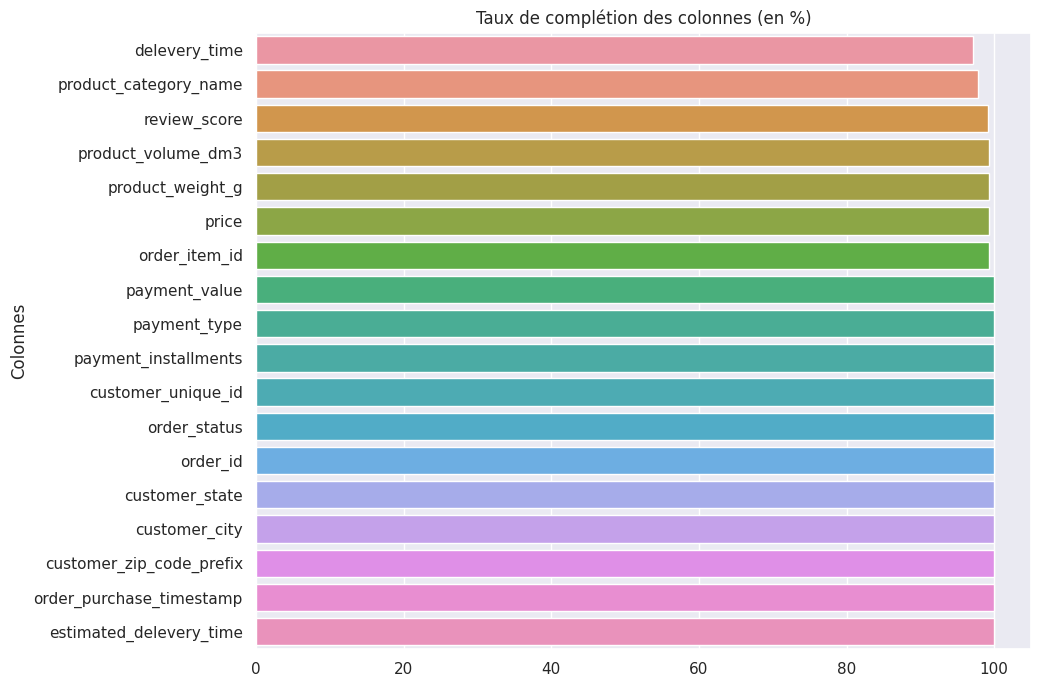

In [39]:
warnings.filterwarnings("ignore")
sns.set()
completion = (df6.count().divide(df6.shape[0])*100).sort_values()
plt.figure(figsize=(10, 8))
ax = sns.barplot(y = completion.index, x=completion.values)
plt.title('Taux de complétion des colonnes (en %)')
plt.ylabel('Colonnes')
plt.show()

### Nettoyage de la variable : product_category_name

In [40]:
# Regrouper les catégories de 'product_category_name'
category_map = {
    
    'office_furniture': 'furniture',
    'furniture_decor': 'furniture',
    'bed_bath_table': 'furniture',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'furniture_living_room': 'furniture',
    'furniture_bedroom': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'la_cuisine': 'furniture',
    
    'housewares': 'home',
    'home_confort': 'home',
    'home_construction': 'home',
    'home_comfort_2': 'home',
    
    'home_appliances_2': 'appliances',
    'small_appliances': 'appliances',
    'small_appliances_home_oven_and_coffee': 'appliances',
    'home_appliances': 'appliances',
    'air_conditioning': 'appliances',
    'electronics': 'appliances',
    
    'sports_leisure': 'leisure',
    'toys': 'leisure',
    'consoles_games': 'leisure',
    'cool_stuff': 'leisure',
    'tablets_printing_image': 'leisure',
    'cine_photo': 'leisure',
    
    'computers_accessories': 'computers',
    'computers': 'computers',
    
    'telephony': 'communication',
    'fixed_telephony': 'communication',
    
    'health_beauty': 'health_beauty',
    'baby': 'health_beauty',
    'perfumery': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    
    'garden_tools': 'tools',
    'construction_tools_lights': 'tools',
    'costruction_tools_tools': 'tools',
    'signaling_and_security': 'tools',
    'construction_tools_construction': 'tools',
    'construction_tools_safety': 'tools',
    'costruction_tools_garden': 'tools',
    
    'art': 'art_music',
    'musical_instruments': 'art_music',
    'music': 'art_music',
    'dvds_blu_ray': 'art_music',
    'audio': 'art_music',
    'cds_dvds_musicals': 'art_music',
    'arts_and_craftmanship': 'art_music',
    
    'books_general_interest': 'book',
    'books_imported': 'book',
    'books_technical': 'book',
    
    'stationery': 'supply',
    'christmas_supplies': 'supply',
    'market_place': 'supply',
    'agro_industry_and_commerce': 'supply',
    'party_supplies': 'supply',
    'industry_commerce_and_business': 'supply',
    
    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'luggage_accessories': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_underwear_beach': 'fashion',
    'watches_gifts': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    
    'food_drink': 'food',
    'drinks': 'food',
    'food': 'food',
    
    'pet_shop': 'other',
    'flowers': 'other',
    'security_and_services': 'other',
    
}

# Appliquer le mapping à la colonne 'product_category_name'
df6['product_category_name'] = df6['product_category_name'].map(category_map)

In [41]:
# Remplacer les valeurs manquantes par 'other' dans la variable 'product_category_name'
df6['product_category_name'].fillna('other', inplace=True)

In [42]:
df6.product_category_name.value_counts()

furniture        23622
leisure          18637
health_beauty    16864
fashion          10202
other             9032
home              8524
computers         8370
tools             6611
appliances        5027
communication     4998
supply            3682
art_music         1468
food              1207
book               899
Name: product_category_name, dtype: int64

In [43]:
df6.isna().sum()

customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
order_id                       0
order_status                   0
order_purchase_timestamp       0
delevery_time               3421
estimated_delevery_time        0
order_item_id                833
price                        833
product_category_name          0
product_weight_g             853
product_volume_dm3           853
review_score                 997
payment_type                   3
payment_installments           3
payment_value                  3
dtype: int64

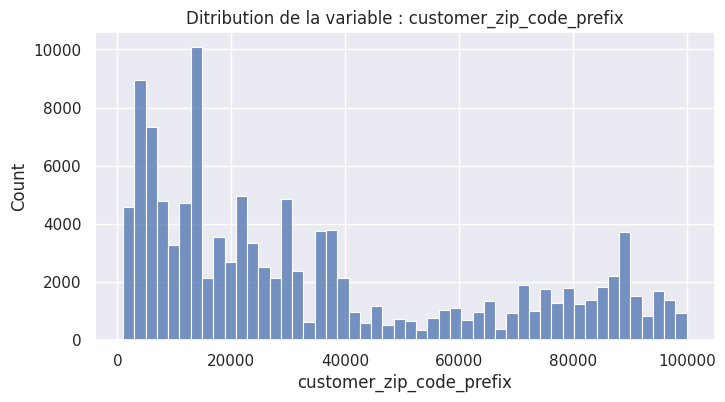

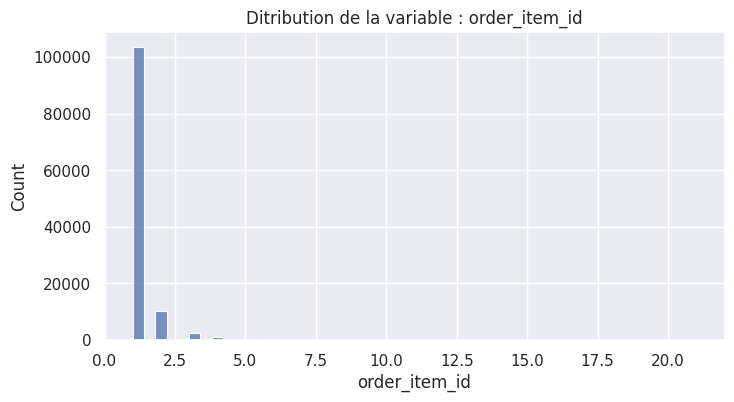

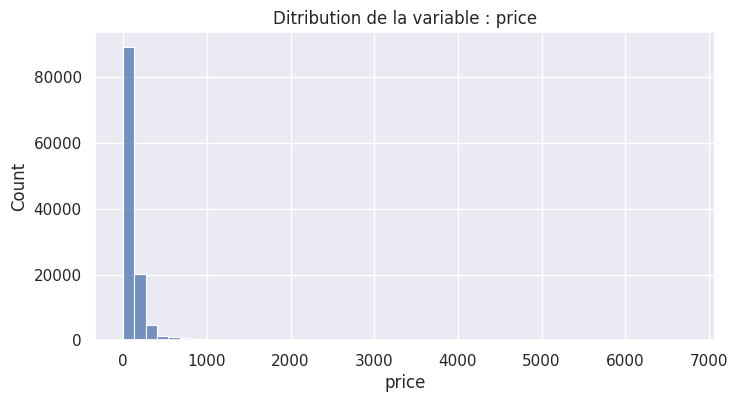

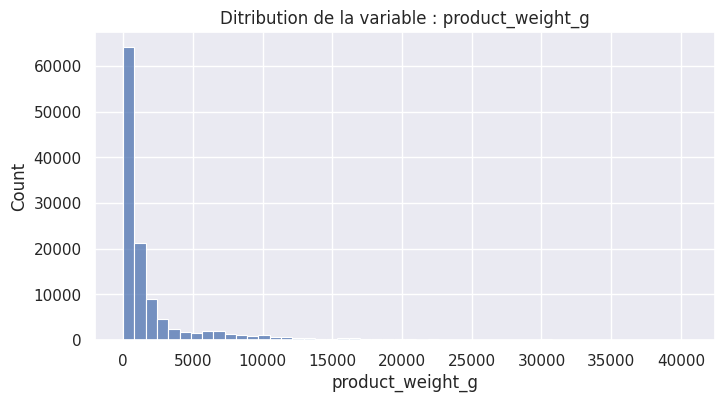

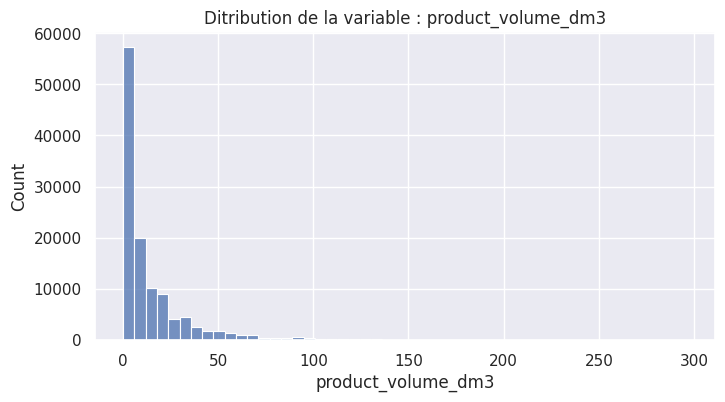

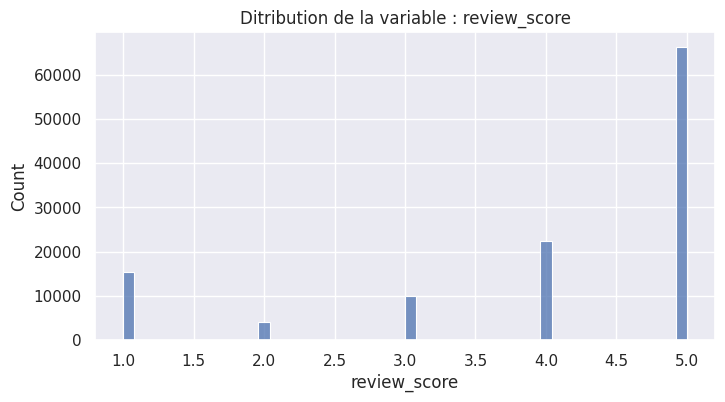

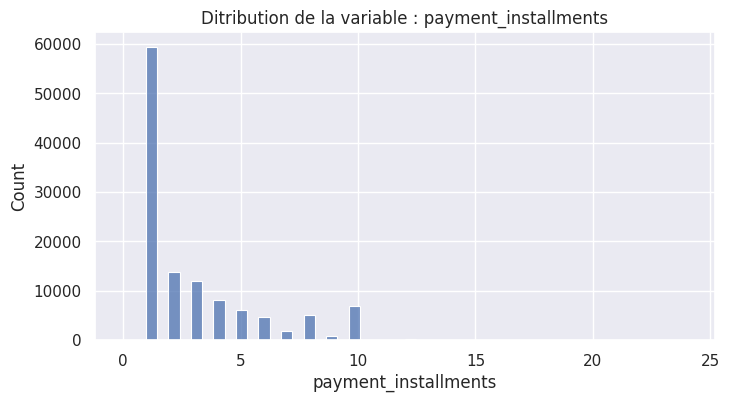

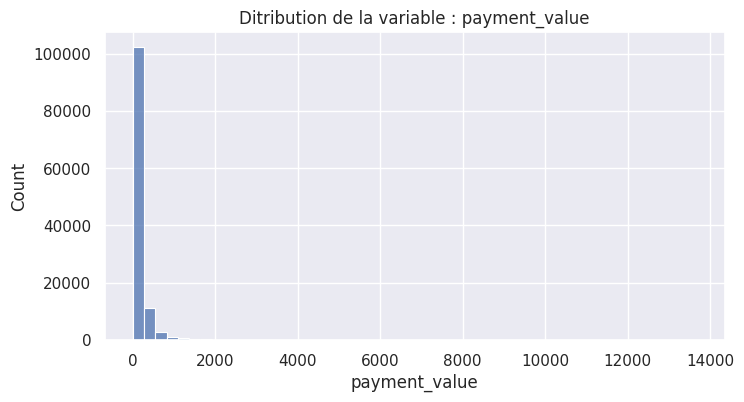

In [44]:
numeric_cols = df6.select_dtypes(include=['int64', 'float64'])
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    titre = 'Ditribution de la variable : ' + col 
    plt.title(titre)
    sns.histplot(df6[col], bins = 50)


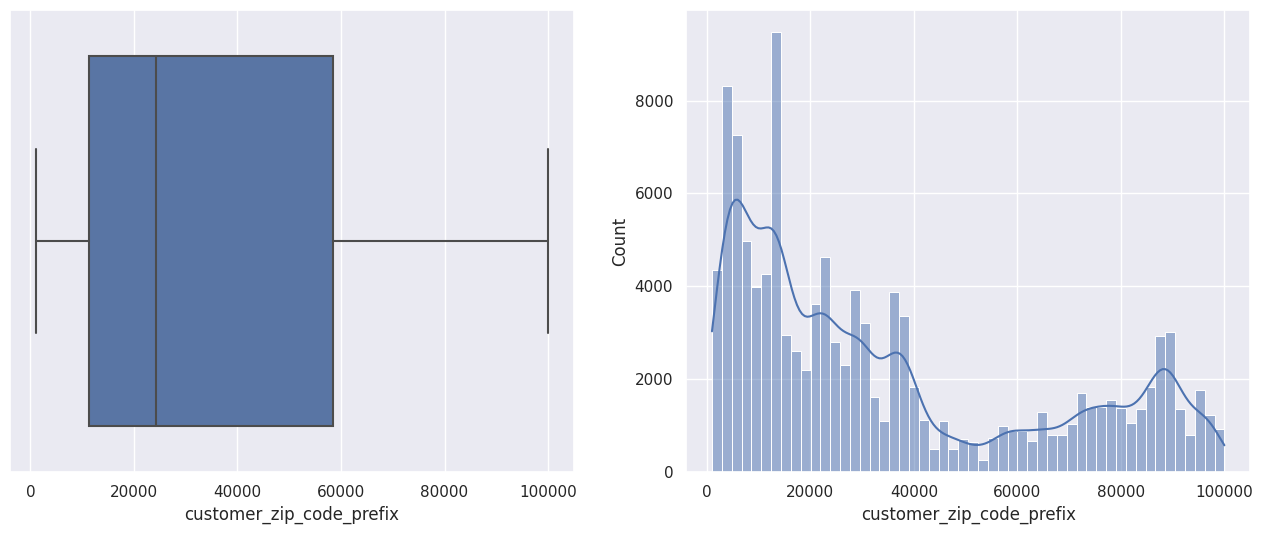

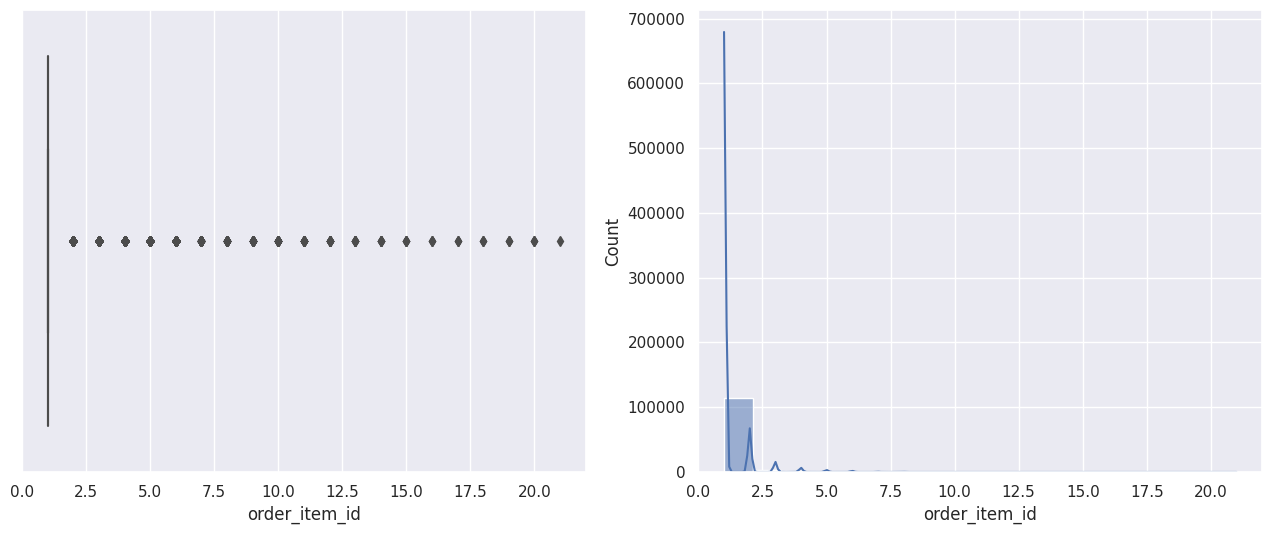

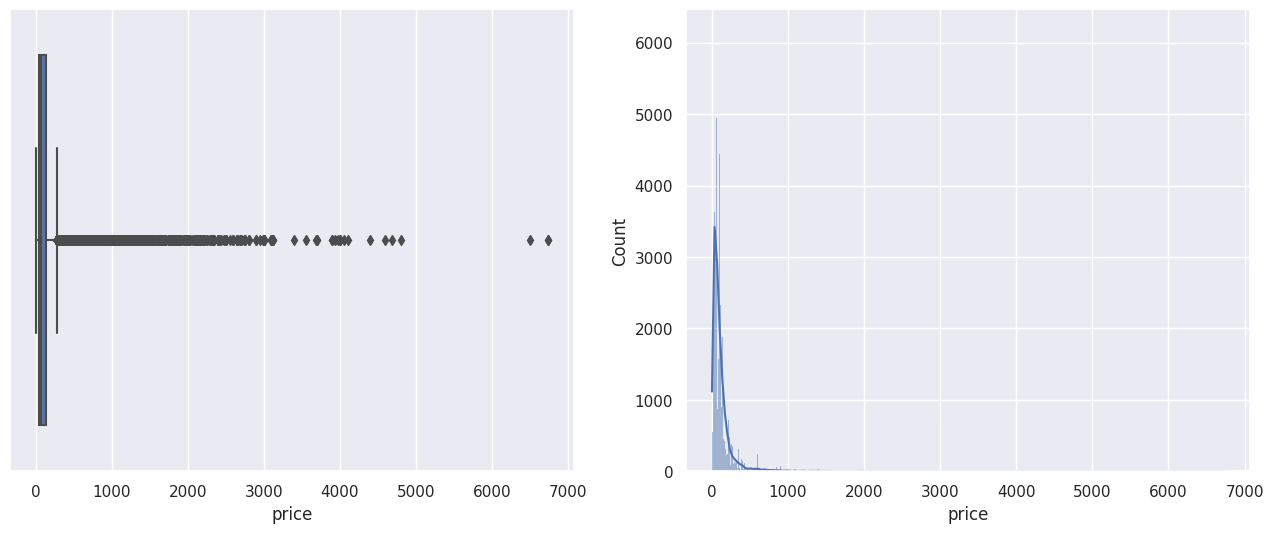

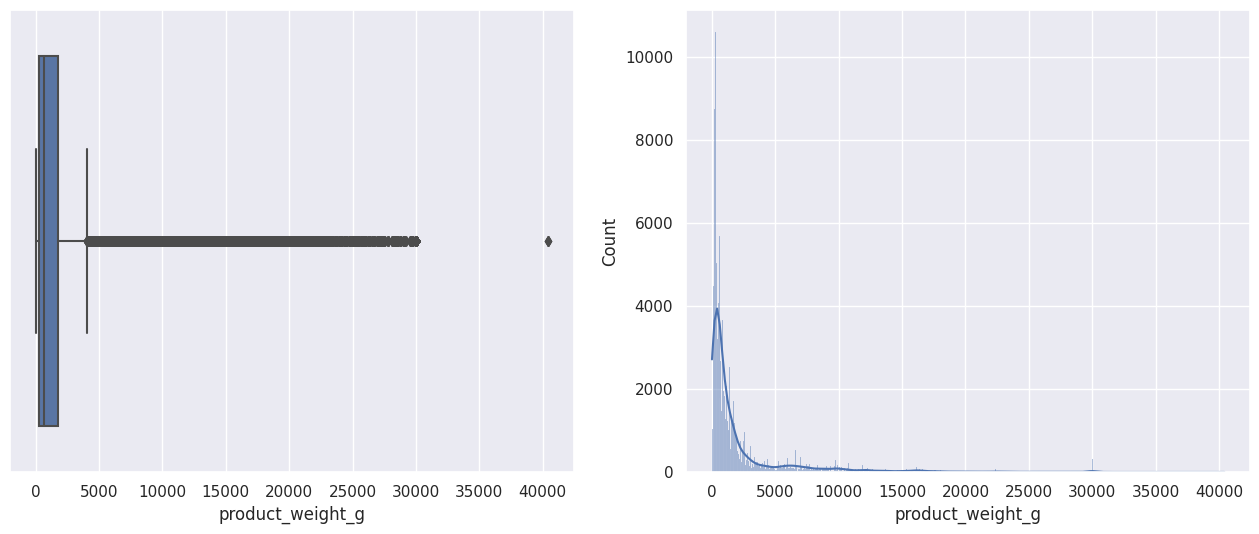

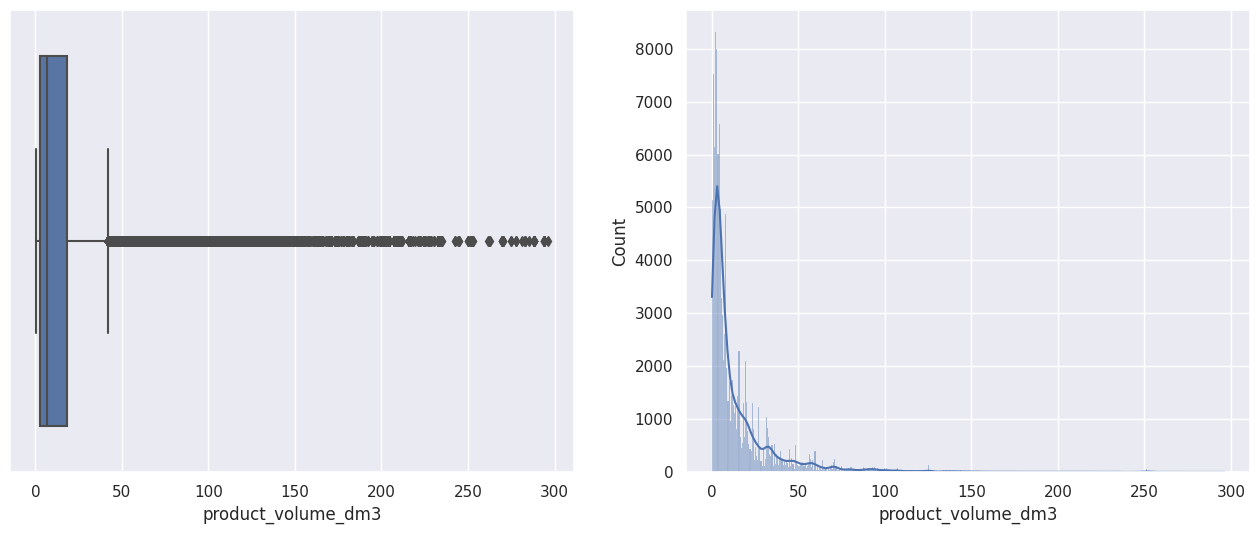

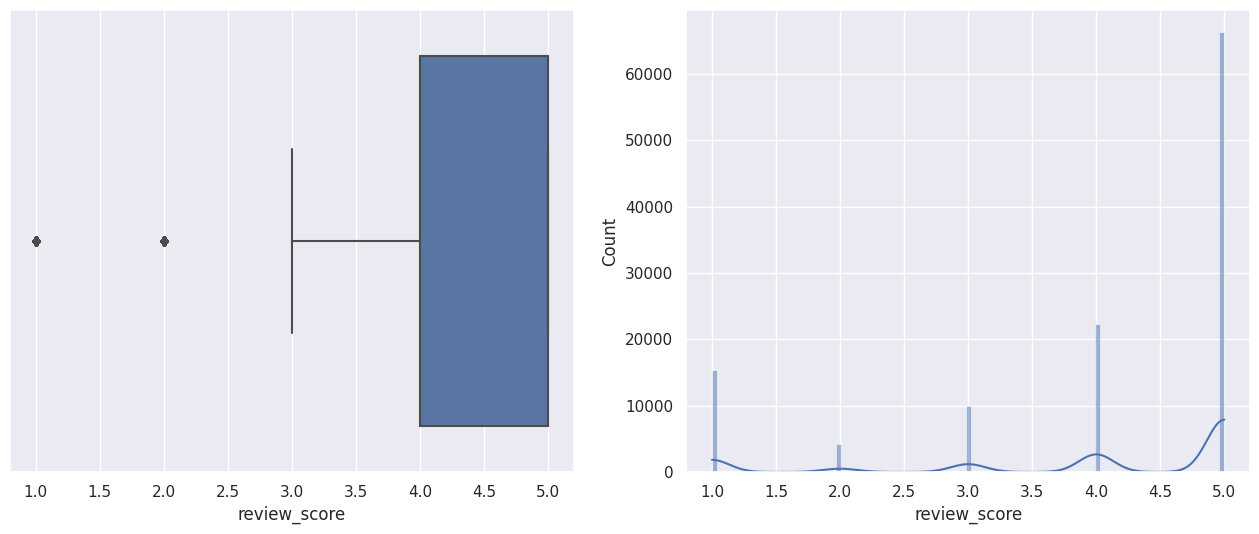

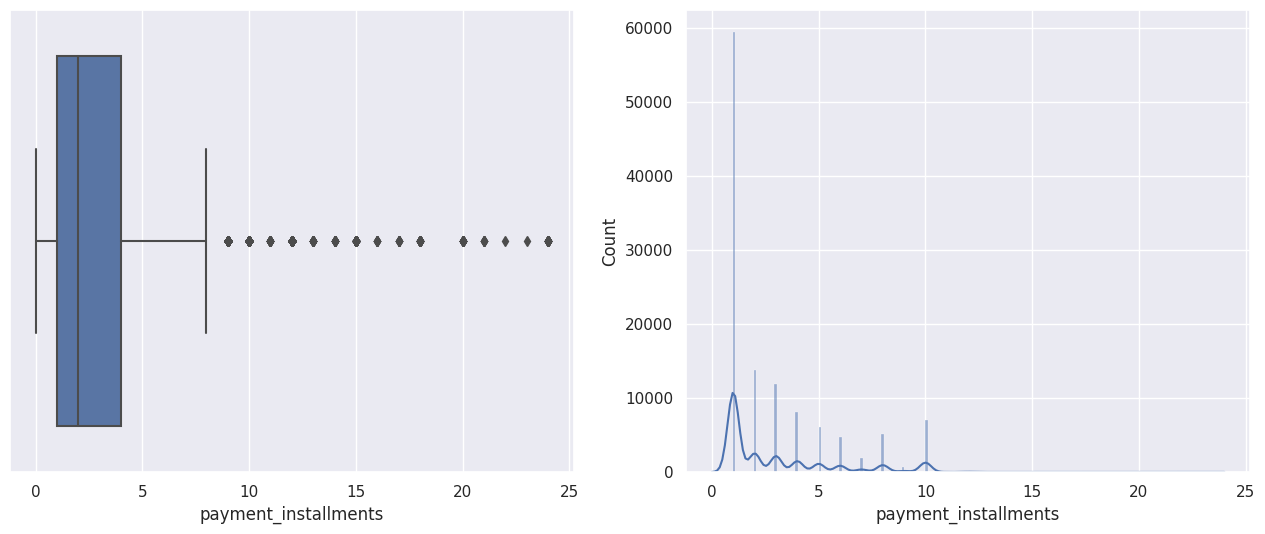

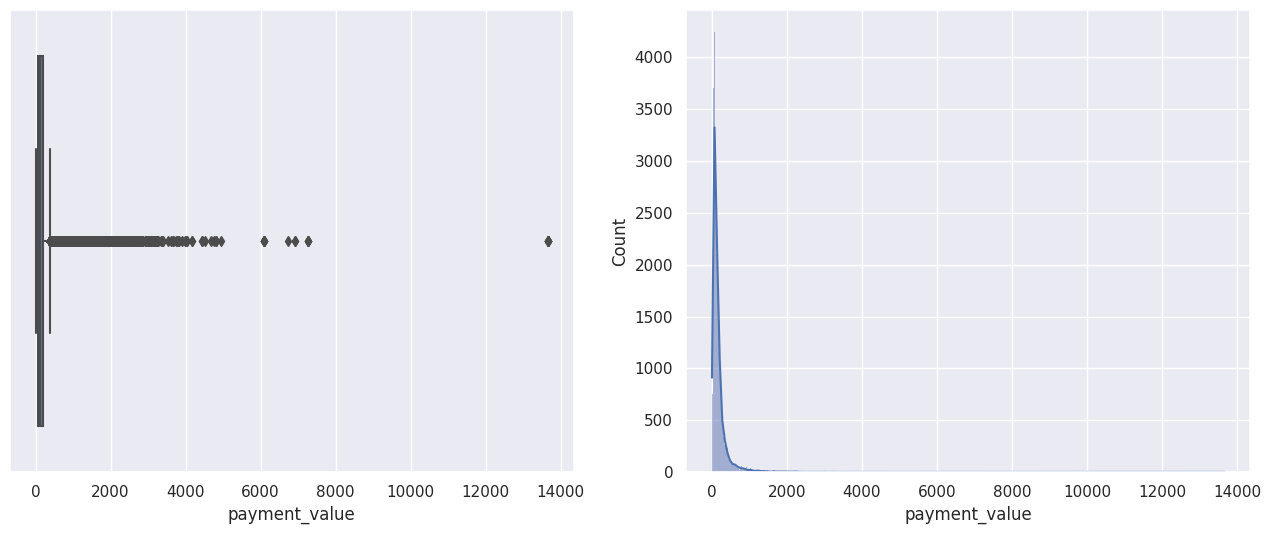

In [161]:
sns.set()
numeric_cols = df6.select_dtypes(include=['int64', 'float64'])
for col in numeric_cols:
    fig, axes = plt.subplots(1,2, figsize= (16,6))
    sns.boxplot(x= df6.loc[:,col], ax = axes[0])
    sns.histplot(df6.loc[:,col], kde = True, ax = axes[1])
    plt.show()

In [162]:
# Suppression outliers - colonnes numériques - méthode IQR
    
def IQR_outlier(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    upp = Q3 + 1.5 * IQR
    
    data = data[(data[variable] >= low) & (data[variable] <= upp)]
    return data[variable]

In [163]:
# Suppression outliers - colonnes numériques - percentile

def percentile_outlier(data, variable):
    lower_bound = data[variable].quantile(0.01)
    upper_bound = data[variable].quantile(0.99)
    
    data = data[(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]
    return data[variable]


In [176]:
df_clean = df6.copy()

In [177]:
df_clean2 = df6.copy()

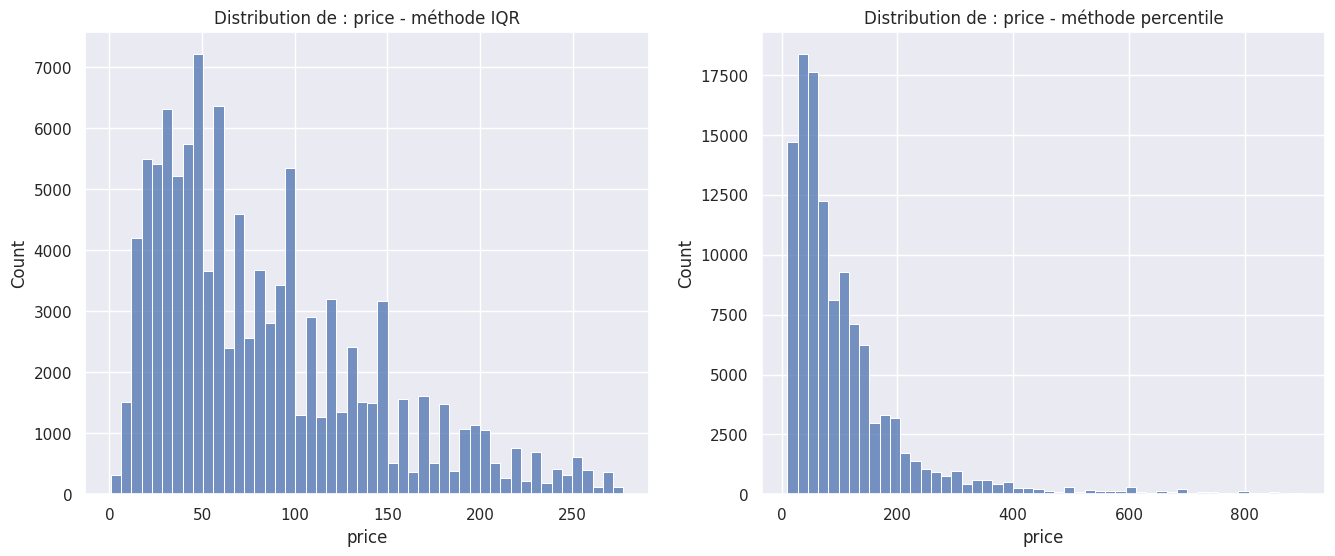

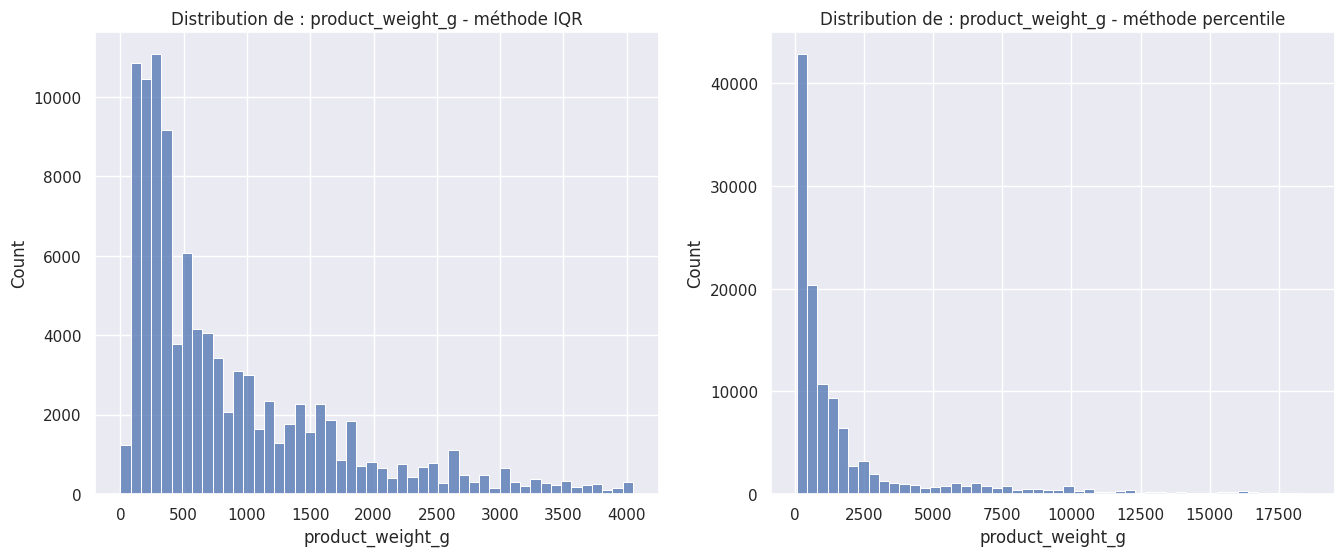

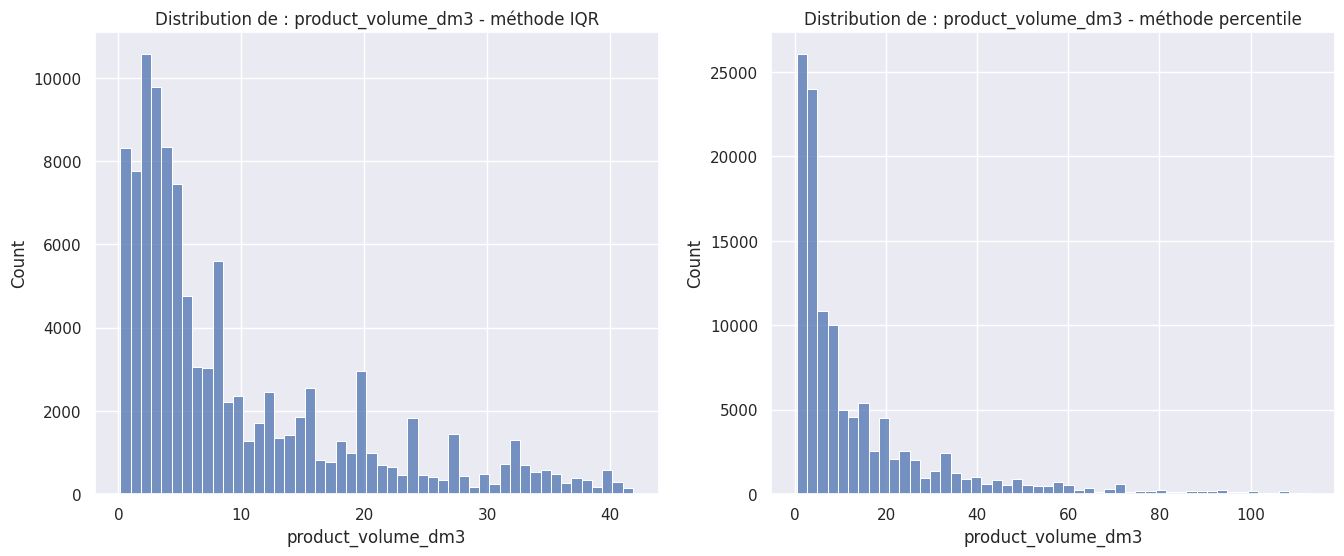

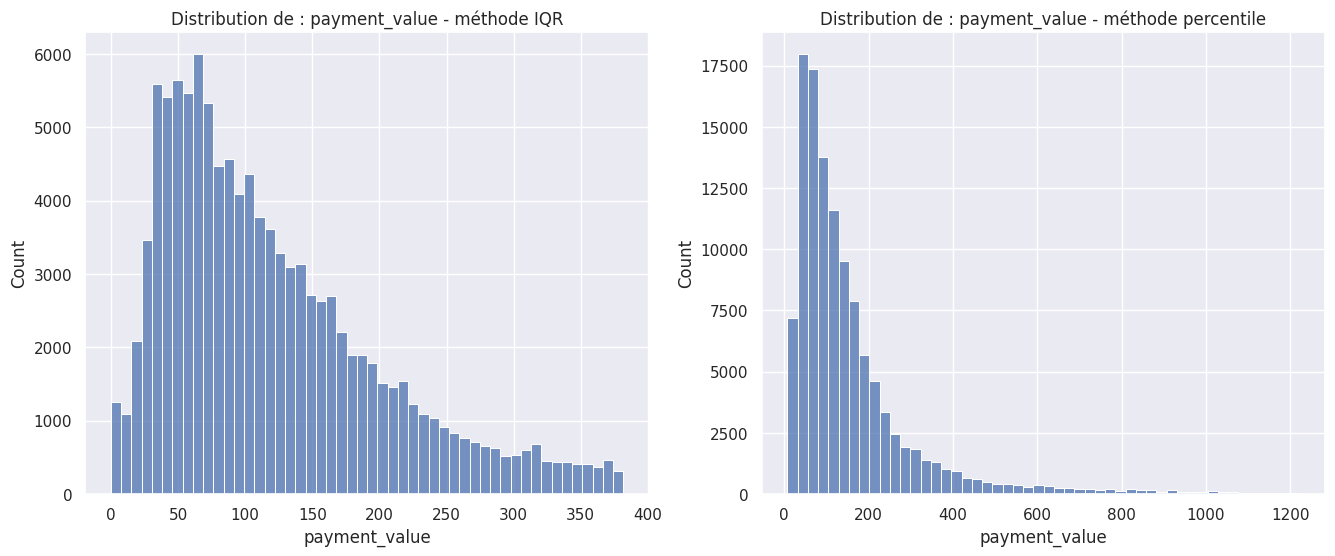

In [178]:
outlier_col = ['price', 'product_weight_g', 'product_volume_dm3', 'payment_value']

for col in outlier_col:
    df_clean[col] = IQR_outlier(df_clean, col)
    df_clean2[col] = percentile_outlier(df_clean2, col)
    
    fig, axes = plt.subplots(1,2, figsize= (16,6))

    titre_1 = "Distribution de : " + col + " - méthode IQR"
    titre_2 = "Distribution de : " + col + " - méthode percentile"

    sns.histplot(df_clean[col], bins = 50, ax = axes[0])
    axes[0].set_title(titre_1)
    sns.histplot(df_clean2[col], bins = 50, ax = axes[1])
    axes[1].set_title(titre_2)
    plt.show()

In [170]:
df_clean.isna().sum()

customer_unique_id              0
customer_zip_code_prefix        0
customer_city                   0
customer_state                  0
order_id                        0
order_status                    0
order_purchase_timestamp        0
delevery_time                3421
estimated_delevery_time         0
order_item_id                 833
price                       13821
product_category_name           0
product_weight_g            25748
product_volume_dm3          21517
review_score                  997
payment_type                    3
payment_installments            3
payment_value               14136
dtype: int64

In [179]:
df_clean2.isna().sum()

customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
order_id                       0
order_status                   0
order_purchase_timestamp       0
delevery_time               3421
estimated_delevery_time        0
order_item_id                833
price                       3151
product_category_name          0
product_weight_g            3115
product_volume_dm3          2037
review_score                 997
payment_type                   3
payment_installments           3
payment_value               2387
dtype: int64

### 3 - Création de nouvelles variables :

#### Création du dataset client :

Variables RFM : 

- Montant_total = somme dépensée par un client
- Fréquence = nombre de commande passées par un client
- Récence = temps écoulé depuis la dernière commande

In [180]:
# aggreger les données: une ligne = un client

def get_mode(x):
    if not x.empty and not x.mode().empty:
        return x.mode().iloc[0]
    else:
        return 'unknown'

df_clean2['montant_total'] = df_clean2['payment_value']


agg_dict = {
    'customer_zip_code_prefix': 'first',
    'customer_city': 'first',
    'customer_state': 'first',
    'order_id': 'nunique', #fréquence du client
    'order_status': lambda x: get_mode(x),
#     'order_status': lambda x: x.mode().iloc[0] if not x.empty else 'unknown',
    
    'order_purchase_timestamp': 'max', # date dernière commande passé
    'delevery_time': 'mean', # délai de livraison moyen
    'estimated_delevery_time': 'mean', # délai estimé moyen
    'order_item_id': 'mean', # nombre d'article par commande
    'price': 'mean', # prix payé par article en moyenne
    'product_category_name': lambda x: get_mode(x),
#     'product_category_name': lambda x: x.mode().iloc[0] if not x.empty else 'unknown',

    'product_weight_g': 'mean',
    'product_volume_dm3': 'mean',
    'review_score': 'mean', # score moyen
#     'payment_type': lambda x: x.mode().iloc[0] if not x.empty else 'unknown',
    'payment_type': lambda x: get_mode(x),
    'payment_installments': 'mean',
    'payment_value': 'mean', # montant moyen par commande
    'montant_total': 'sum'
}

print("Taille du dataset avant aggrégation ", df_clean2.shape)
data_client = df_clean2.groupby('customer_unique_id', as_index=True).agg(agg_dict)
print("Taille du dataset après aggrégation ", data_client.shape)


Taille du dataset avant aggrégation  (119143, 19)
Taille du dataset après aggrégation  (96096, 18)


In [181]:
data_client.head(20)

,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,price,product_category_name,product_weight_g,product_volume_dm3,review_score,payment_type,payment_installments,payment_value,montant_total
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,1,delivered,2018-05-10 10:56:27,6 days 09:52:10,10 days 13:03:33,1.0,129.90,furniture,1500.0,7.6160,5.0,credit_card,8.0,141.90,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,1,delivered,2018-05-07 11:11:27,3 days 06:51:15,7 days 12:48:33,1.0,18.90,health_beauty,375.0,5.1480,4.0,credit_card,1.0,27.19,27.19
0000f46a3911fa3c0805444483337064,88115,sao jose,SC,1,delivered,2017-03-10 21:05:03,25 days 17:33:44,27 days 02:54:57,1.0,69.00,supply,1500.0,43.7500,3.0,credit_card,8.0,86.22,86.22
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,1,delivered,2017-10-12 20:29:41,20 days 00:53:24,31 days 03:30:19,1.0,25.99,communication,150.0,1.0450,4.0,credit_card,4.0,43.62,43.62
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,1,delivered,2017-11-14 19:45:42,13 days 03:23:14,20 days 04:14:18,1.0,180.00,communication,6050.0,0.5280,5.0,credit_card,6.0,196.89,196.89
0004bd2a26a76fe21f786e4fbd80607f,5036,sao paulo,SP,1,delivered,2018-04-05 19:33:16,1 days 20:39:27,13 days 04:26:44,1.0,154.00,tools,3000.0,8.2410,4.0,credit_card,8.0,166.98,166.98
00050ab1314c0e55a6ca13cf7181fecf,13084,campinas,SP,1,delivered,2018-04-20 12:57:23,6 days 23:11:36,18 days 11:02:37,1.0,27.99,communication,300.0,0.8160,4.0,boleto,1.0,35.38,35.38
00053a61a98854899e70ed204dd4bafe,80410,curitiba,PR,1,delivered,2018-02-28 11:15:41,16 days 07:47:10,25 days 12:44:19,1.5,191.00,leisure,1133.5,15.0590,1.0,credit_card,3.0,419.18,838.36
0005e1862207bf6ccc02e4228effd9a0,25966,teresopolis,RJ,1,delivered,2017-03-04 23:32:12,4 days 09:00:56,32 days 00:27:48,1.0,135.00,fashion,2250.0,6.6000,4.0,credit_card,3.0,150.12,150.12


In [182]:
data_client.count()/data_client.shape[0]*100

customer_zip_code_prefix    100.000000
customer_city               100.000000
customer_state              100.000000
order_id                    100.000000
order_status                100.000000
order_purchase_timestamp    100.000000
delevery_time                97.148685
estimated_delevery_time     100.000000
order_item_id                99.296537
price                        97.564935
product_category_name       100.000000
product_weight_g             97.466076
product_volume_dm3           98.311064
review_score                 99.254912
payment_type                100.000000
payment_installments         99.998959
payment_value                99.227855
montant_total               100.000000
dtype: float64

In [183]:
data_client['recence'] = (data_client.order_purchase_timestamp.max() - data_client.order_purchase_timestamp).dt.days

In [184]:
data_client['frequence'] = data_client['order_id']

In [185]:
data_client['delevery_time'] = data_client['delevery_time'].dt.days

In [186]:
data_client['estimated_delevery_time'] = data_client['estimated_delevery_time'].dt.days

In [187]:
data_client.duplicated().sum()

0

In [188]:
data_client.to_csv('data_final.csv')

In [189]:
data_client.drop(columns=['order_purchase_timestamp', 'order_id'], inplace=True)

In [191]:
df6.to_csv('data_merged.csv')
data_client.to_csv('data_client.csv')

In [3]:
data_client = pd.read_csv('data_client.csv')

### 4 - Analyse univariée et multivariée :

### Customer_city

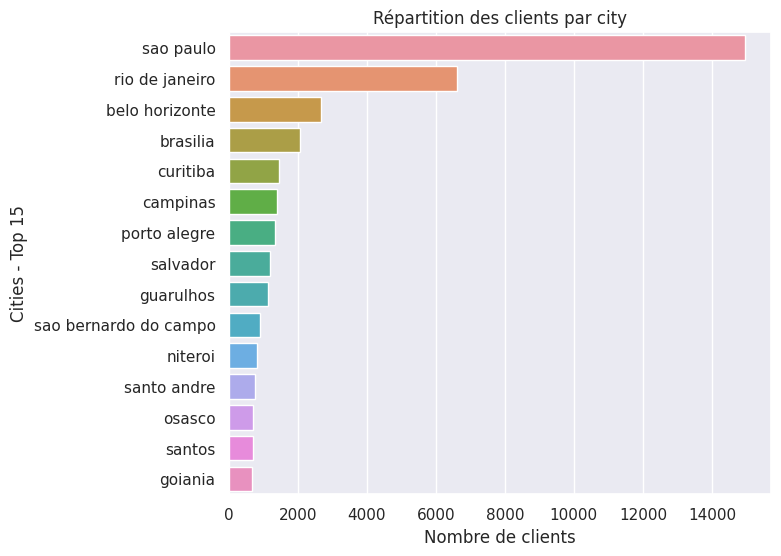

In [10]:
sns.set()
plt.subplots(figsize =(7, 6))
city = data_client["customer_city"]
top_city = city.value_counts().index[:15]
ax = sns.countplot(y=city, order=top_city)
plt.title("Répartition des clients par city")
plt.xlabel("Nombre de clients")
plt.ylabel("Cities - Top 15")
plt.show()

### Customer_state

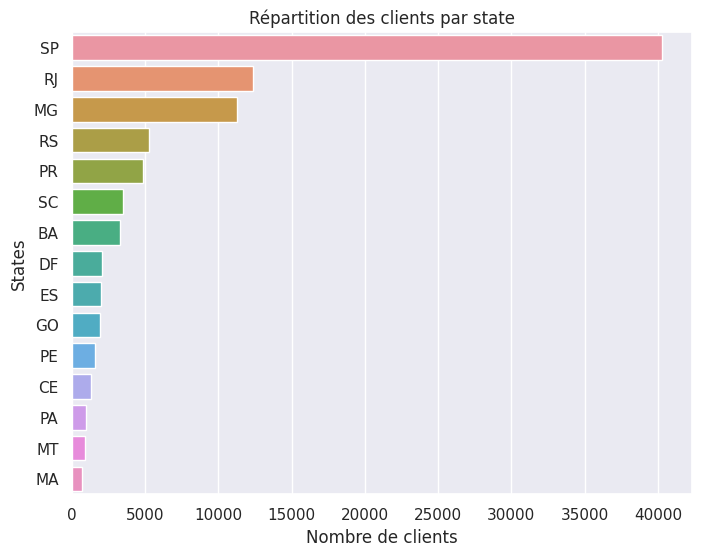

In [11]:
sns.set()
plt.subplots(figsize = (8,6))
state = data_client["customer_state"]
top_state = state.value_counts().index[:15]
ax = sns.countplot(y=state, order=top_state)
plt.title("Répartition des clients par state")
plt.xlabel("Nombre de clients")
plt.ylabel("States")
plt.show()

### order_status

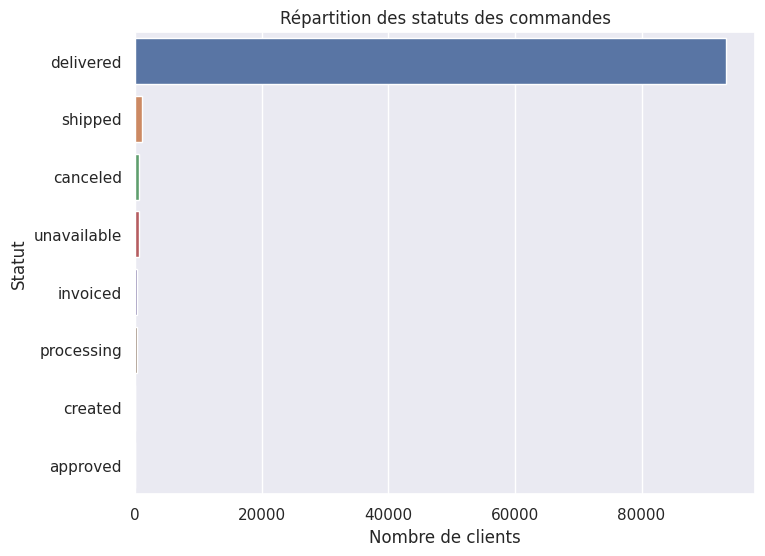

In [99]:
plt.subplots(figsize = (8,6))
state = data_client["order_status"]
ax = sns.countplot(y=state, order=state.value_counts().index)
plt.title("Répartition des statuts des commandes")
plt.xlabel("Nombre de clients")
plt.ylabel("Statut")
plt.show()

### Delivery_time & estimated_delivery_time

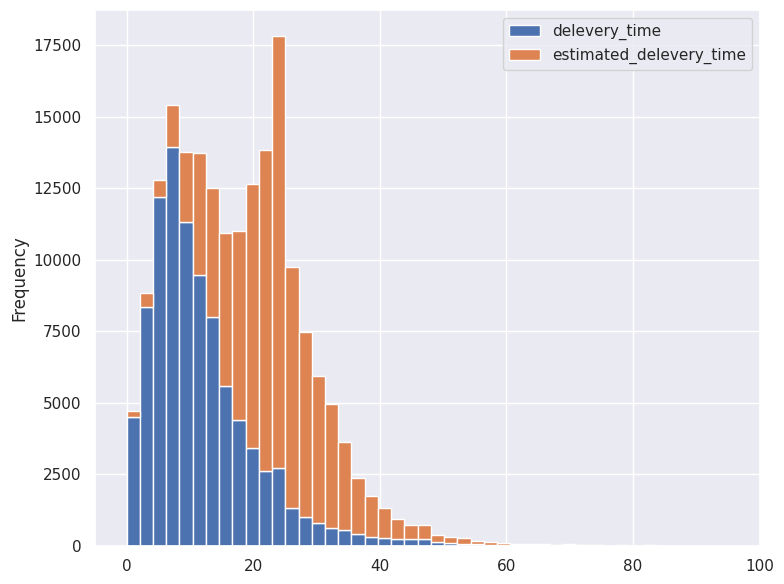

In [97]:
cols = ['delevery_time', 'estimated_delevery_time']
data_client[cols].plot(kind='hist', bins=100, stacked=True, figsize=(8, 6), layout=(2, 1))
plt.xlim(-5, 100)
plt.tight_layout()
plt.show()

### Product_category_name

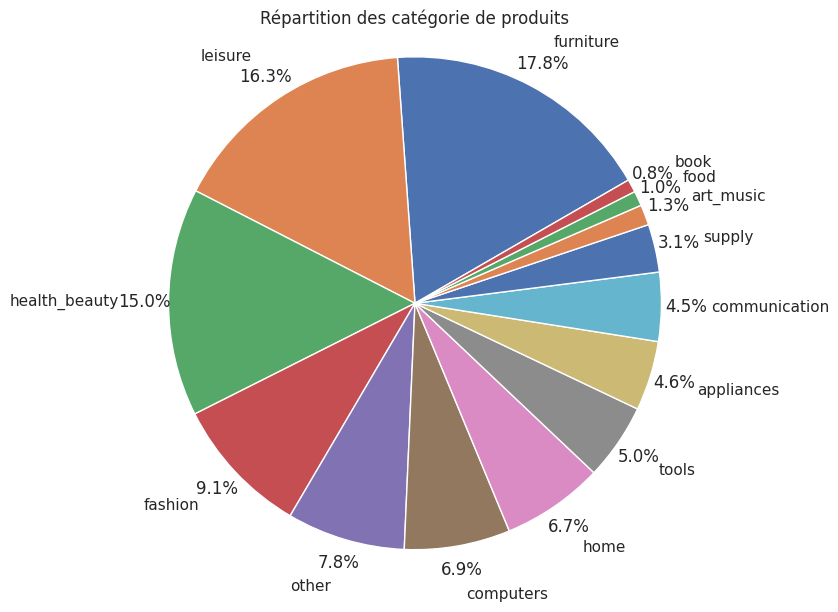

In [110]:
plt.figure(figsize=(7, 7))
plt.pie(data_client['product_category_name'].value_counts(), 
        labels=data_client['product_category_name'].value_counts().index, autopct='%1.1f%%',pctdistance = 1.1,
        labeldistance = 1.2, startangle=30, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },)
plt.axis('equal') 
plt.title('Répartition des catégorie de produits')
plt.show()

### Price - prix moyen par article

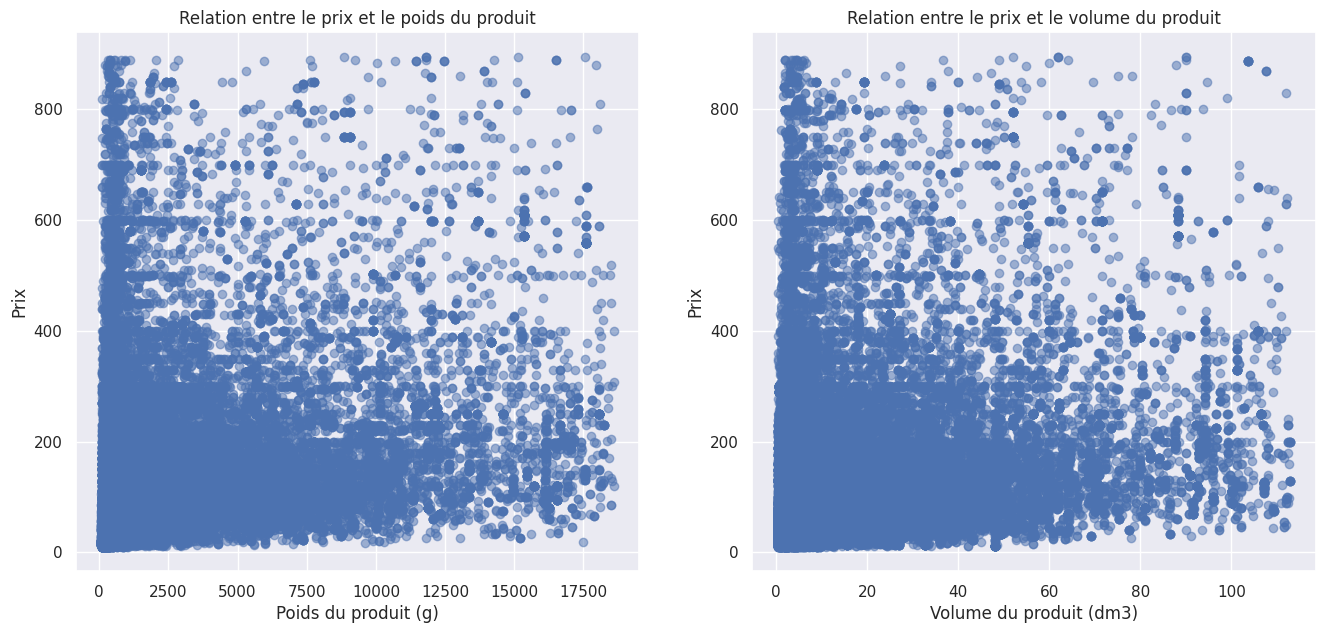

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].scatter(data_client['product_weight_g'], data_client['price'], alpha=0.5)  
axes[0].set_title("Relation entre le prix et le poids du produit")
axes[0].set_xlabel('Poids du produit (g)')
axes[0].set_ylabel('Prix')


axes[1].scatter(data_client['product_volume_dm3'], data_client['price'], alpha=0.5)t 
axes[1].set_title("Relation entre le prix et le volume du produit")
axes[1].set_xlabel('Volume du produit (dm3)')
axes[1].set_ylabel('Prix')

plt.show()

### Payment_value - montant moyen par commande

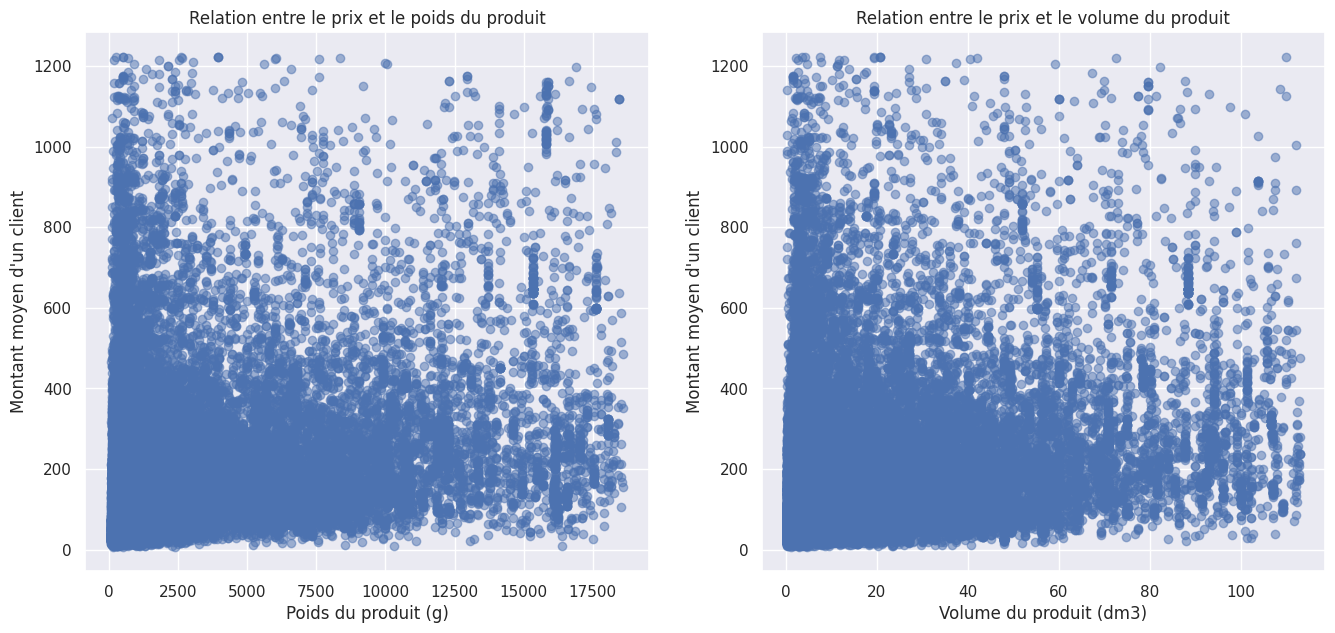

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].scatter(data_client['product_weight_g'], data_client['payment_value'], alpha=0.5)  
axes[0].set_title("Relation entre le prix et le poids du produit")
axes[0].set_xlabel('Poids du produit (g)')
axes[0].set_ylabel("Montant moyen d'un client")


axes[1].scatter(data_client['product_volume_dm3'], data_client['payment_value'], alpha=0.5)
axes[1].set_title("Relation entre le prix et le volume du produit")
axes[1].set_xlabel('Volume du produit (dm3)')
axes[1].set_ylabel("Montant moyen d'un client")

plt.show()

### Montant total 

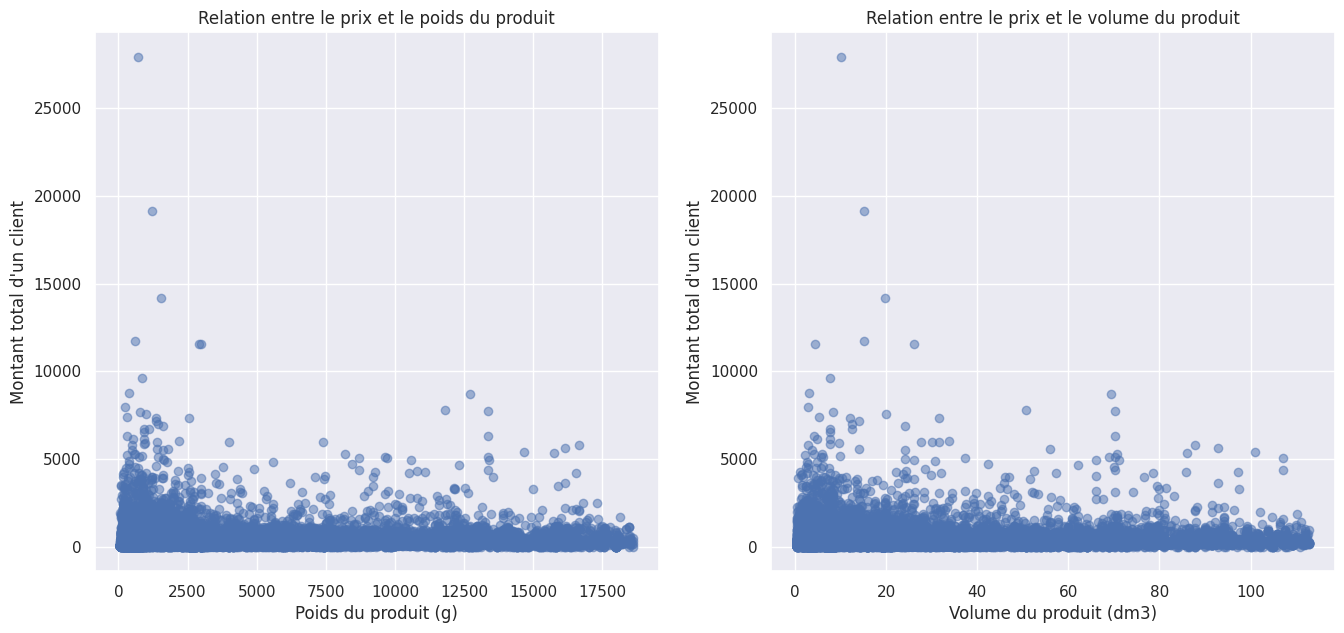

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].scatter(data_client['product_weight_g'], data_client['montant_total'], alpha=0.5)  
axes[0].set_title("Relation entre le prix et le poids du produit")
axes[0].set_xlabel('Poids du produit (g)')
axes[0].set_ylabel("Montant total d'un client")


axes[1].scatter(data_client['product_volume_dm3'], data_client['montant_total'], alpha=0.5)
axes[1].set_title("Relation entre le prix et le volume du produit")
axes[1].set_xlabel('Volume du produit (dm3)')
axes[1].set_ylabel("Montant total d'un client")

plt.show()

In [12]:
# Remplacer les valeurs nan de review_score par une valeur 1 et transformer la note moyenne en valeur entière
data_client['review_score'] = data_client['review_score'].fillna(1).astype(int)
data_client.review_score.unique()

array([5, 4, 3, 1, 2])

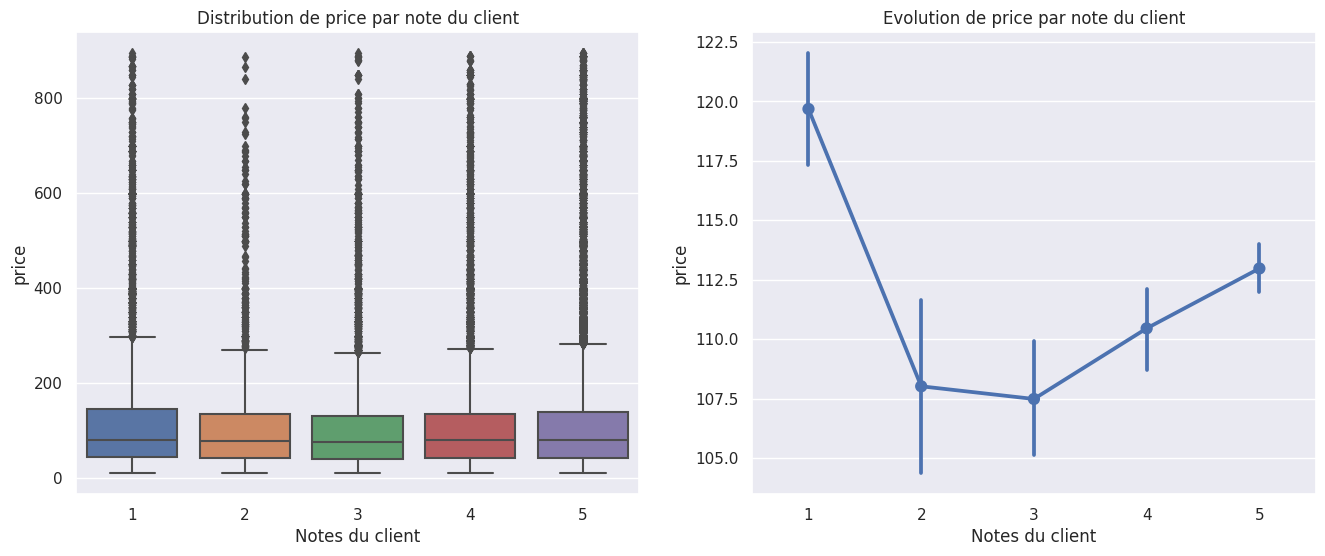

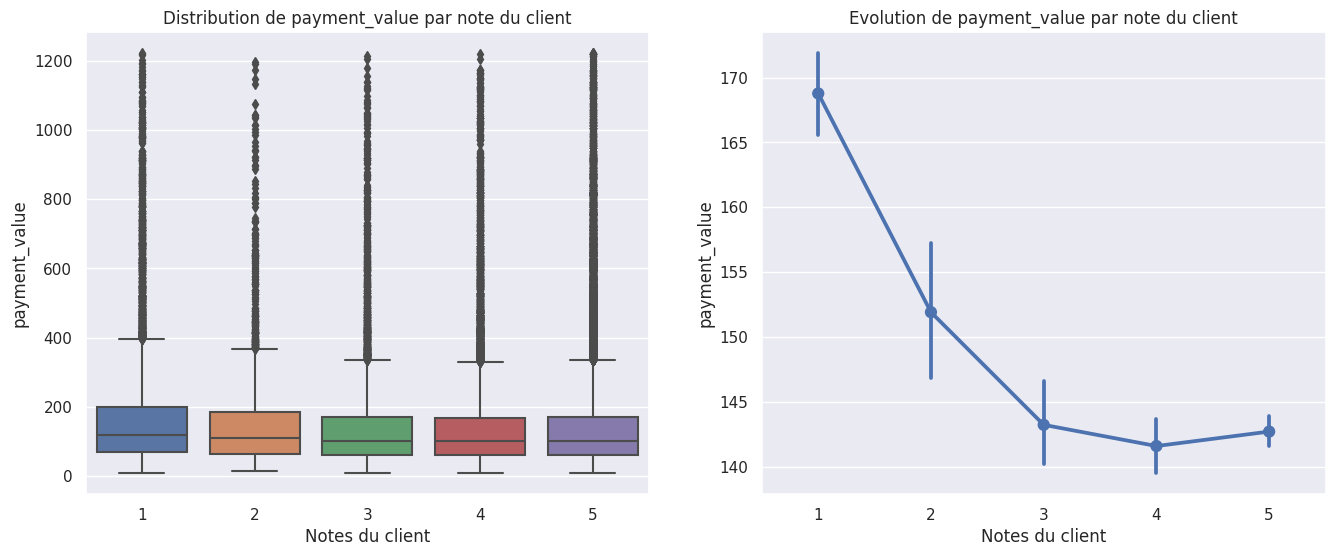

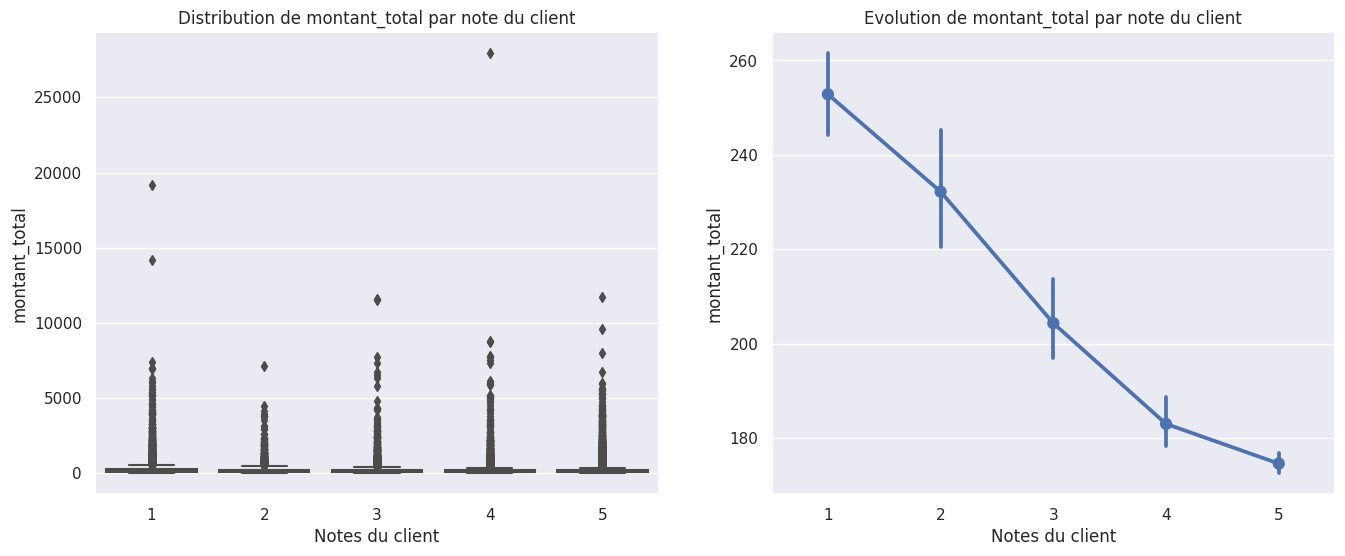

In [14]:
import warnings
warnings.filterwarnings("ignore")

col_plot=['price', 'payment_value', 'montant_total' ]
# ordre=['0','1','2','3','4', '5']

for col in col_plot:
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    sns.boxplot(data=data_client, x='review_score', y=col, ax=ax[0]) 
    titre_1 = "Distribution de " + col + " par note du client"
    ax[0].set_title(titre_1)
    ax[0].set_xlabel("Notes du client")
    ax[0].set_ylabel(col)
    
    sns.pointplot(data = data_client, x = 'review_score', y = col, ax=ax[1]) 
    titre_2 = "Evolution de " + col + " par note du client"
    ax[1].set_title(titre_2)
    ax[1].set_xlabel("Notes du client")
    ax[1].set_ylabel(col)
    
    plt.show()

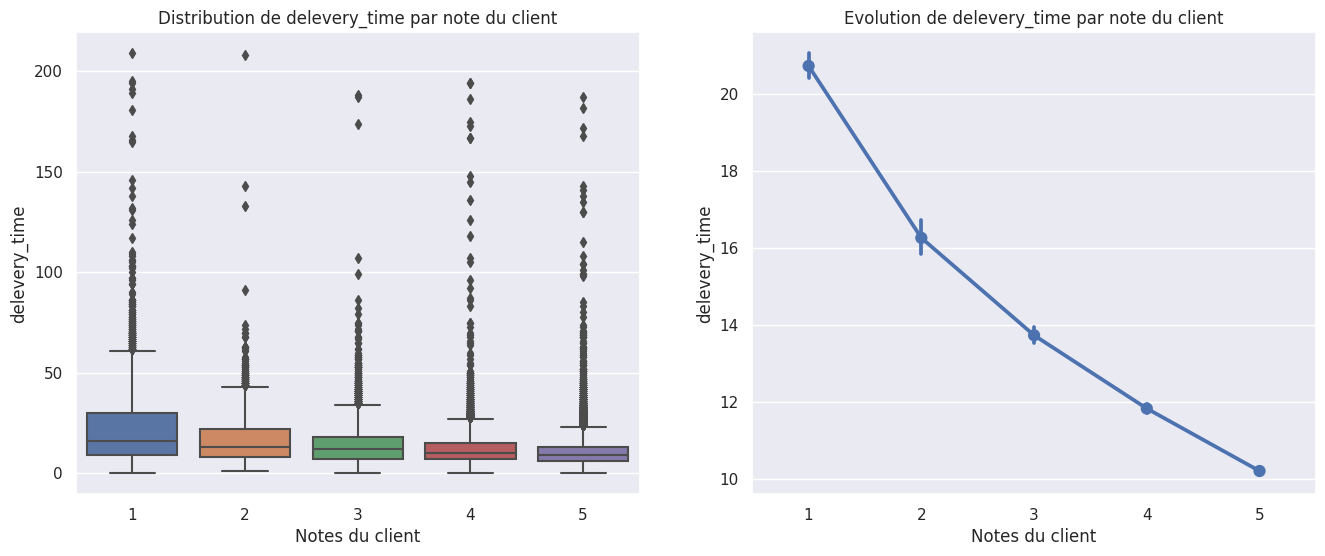

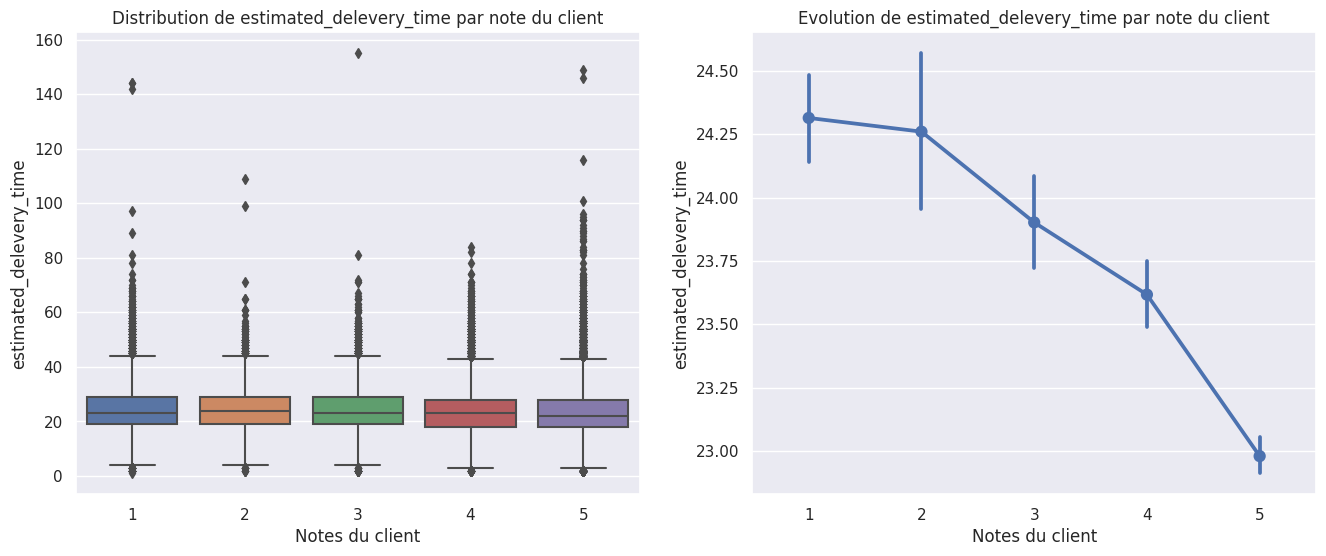

In [16]:
warnings.filterwarnings("ignore")

col_plot=['delevery_time', 'estimated_delevery_time']
# ordre=['1','2','3','4', '5']

for col in col_plot:
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    sns.boxplot(data=data_client, x='review_score', y=col, ax=ax[0]) 
    titre_1 = "Distribution de " + col + " par note du client"
    ax[0].set_title(titre_1)
    ax[0].set_xlabel("Notes du client")
    ax[0].set_ylabel(col)
    
    sns.pointplot(data = data_client, x = 'review_score', y = col, ax=ax[1]) 
    titre_2 = "Evolution de " + col + " par note du client"
    ax[1].set_title(titre_2)
    ax[1].set_xlabel("Notes du client")
    ax[1].set_ylabel(col)
    
    plt.show()

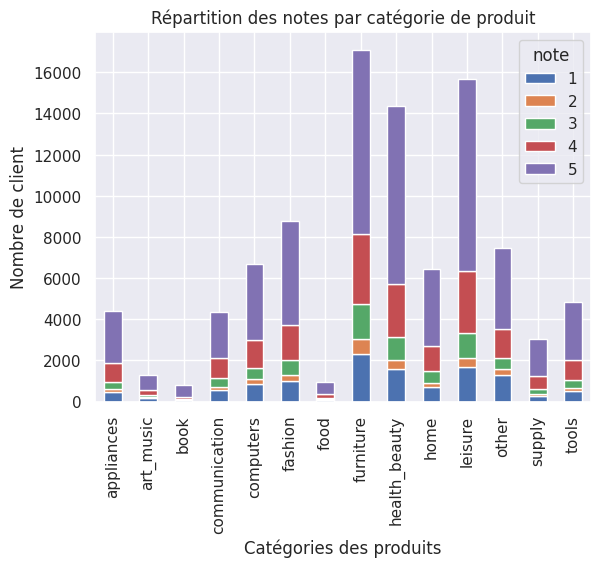

In [18]:
# Visualisation de la répartition des category_name par review_score

category_note = pd.crosstab(data_client['product_category_name'], data_client['review_score'])

category_note.plot(kind='bar', stacked=True)
plt.xlabel('Catégories des produits')
plt.ylabel('Nombre de client')
plt.title('Répartition des notes par catégorie de produit')
plt.legend(title='note')
plt.show()

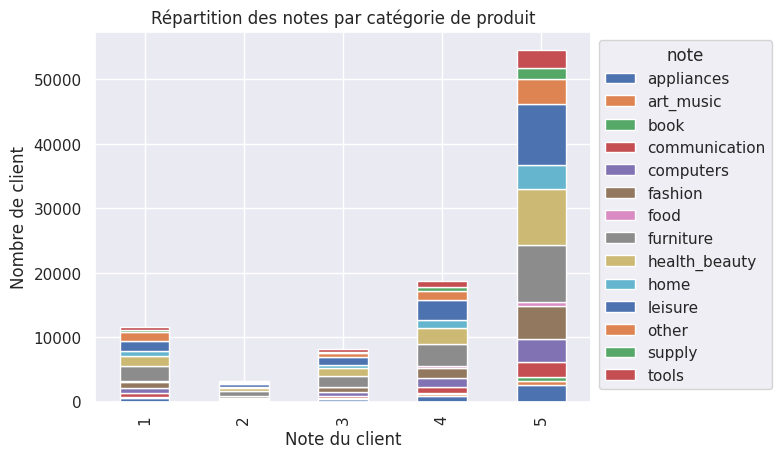

In [21]:
# Visualisation de la répartition des category_name par review_score

category_note = pd.crosstab(data_client['review_score'], data_client['product_category_name'])

category_note.plot(kind='bar', stacked=True)
plt.xlabel('Note du client')
plt.ylabel('Nombre de client')
plt.title('Répartition des notes par catégorie de produit')
plt.legend(title='note', bbox_to_anchor=(1, 1))
plt.show()

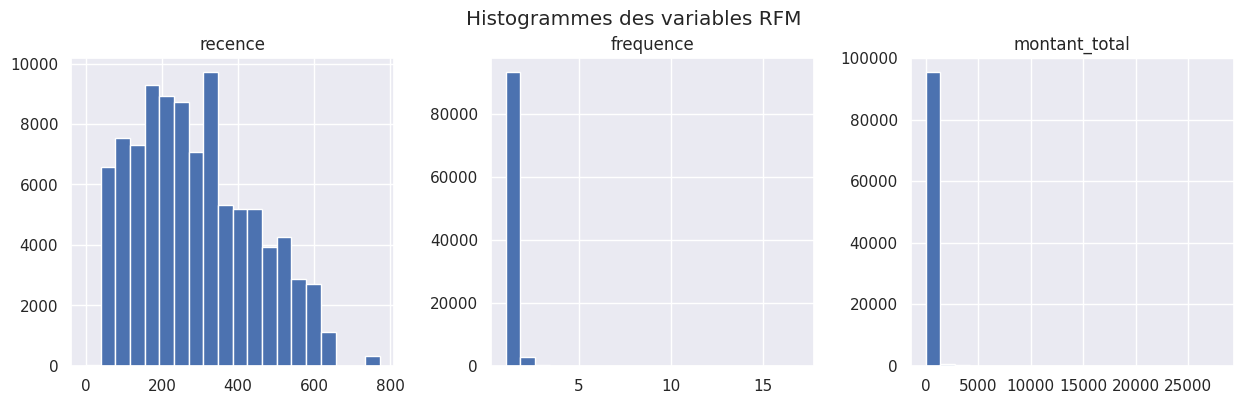

In [22]:
data_client[['recence', 'frequence', 'montant_total']].hist(bins=20, figsize=(15, 4), layout=(1,3))
plt.suptitle('Histogrammes des variables RFM', y=1)
plt.show()


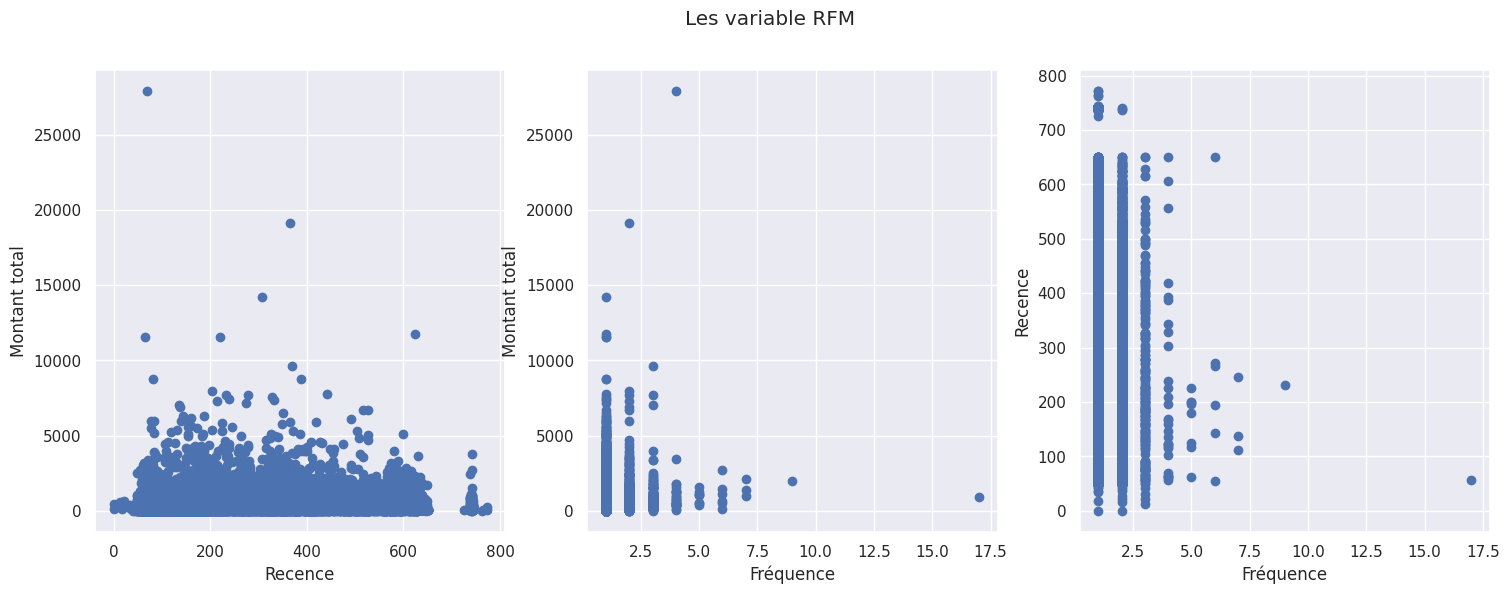

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,6))
fig.suptitle('Les variable RFM')


ax1.scatter(data_client['recence'], data_client['montant_total'])
ax1.set_xlabel('Recence')
ax1.set_ylabel('Montant total')
# ax1.label_outer()

ax2.scatter(data_client['frequence'], data_client['montant_total'])
ax2.set_xlabel('Fréquence')
ax2.set_ylabel('Montant total')

ax3.scatter(data_client['frequence'], data_client['recence'])
ax3.set_xlabel('Fréquence')
ax3.set_ylabel('Recence')
plt.show()

### Matrice de corrélation

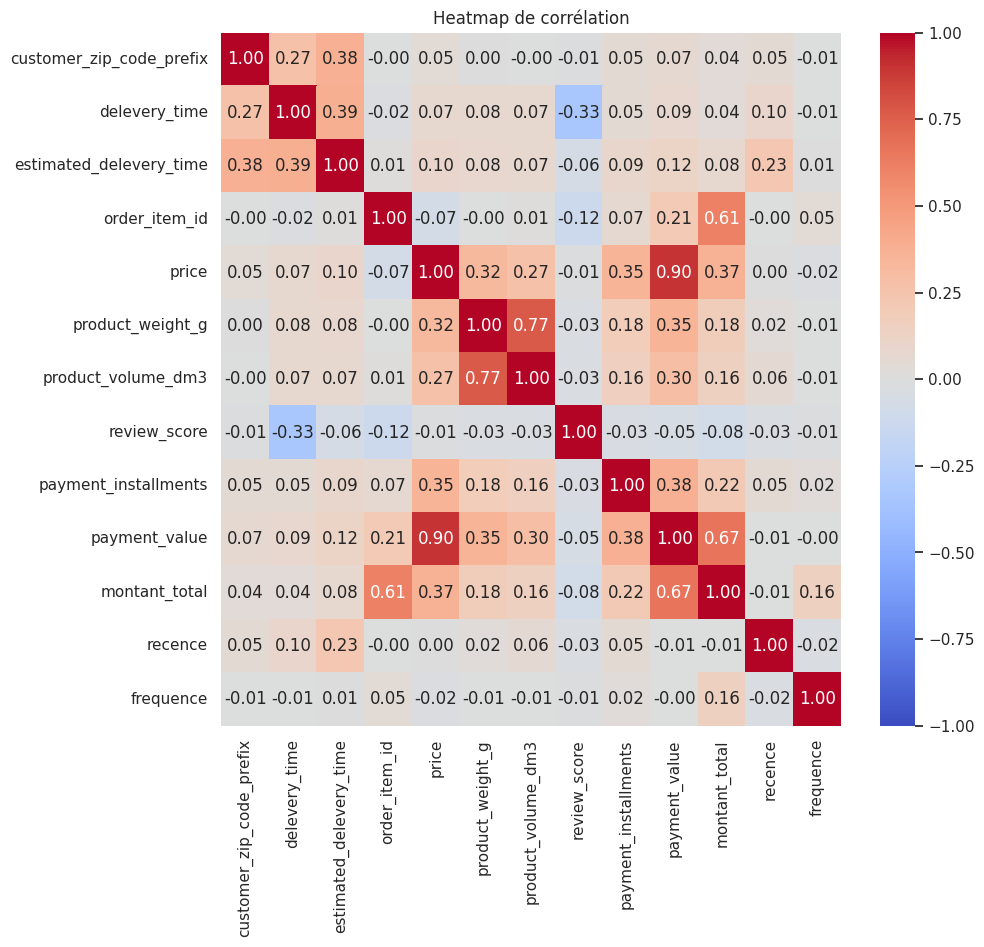

In [24]:
df_corr = data_client.corr()
plt.subplots(figsize = (10,9))
sns.heatmap(df_corr, cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap de corrélation')
plt.show()

Nous constatons plusieurs corrélations:
   - Forte corrélation 
       - Entre price et payment_value : 0.90 (le prix de l'article acheté et le montant d'une commande) 
       - Entre le poids et le volume d'un produit : 0.77
       - Entre le montant d'une commande (payment_value) et le montant total dépensé par un client : 0.67
       - entre le montant total d'un client et le nombre d'article acheté : 0.61
   - Correlation légère :
       - Price et montant_total : 0.31
       - Product_weight et payment_value : 0.35
       -  Price et payment_installments : 0.35 (prix d'un article et échelonnement du paiement)
   - Légère correlation négative :
       - review_score et delevery_time : 0.35 (note du client et délai de livraison)